In [1]:
import keras_ocr
import pytesseract

print(keras_ocr.__version__)
print(pytesseract.__version__)

0.8.8
0.3.8


Step1. 검증용 데이터셋 준비

In [2]:
import matplotlib.pyplot as plt
import keras_ocr
import os

pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [3]:
data_path = os.getenv('HOME')+ '/aiffel/OCR'
data_path

'/aiffel/aiffel/OCR'

In [4]:
file_path = [
    '/aiffel/aiffel/OCR/img1.jpg',
    '/aiffel/aiffel/OCR/img2.jpg',
    '/aiffel/aiffel/OCR/img3.jpg'
]

Step2. keras-ocr, Tesseract로 테스트 진행(Google OCR API는 선택 사항)

In [5]:
images = [keras_ocr.tools.read(path) for path in file_path]
prediction_groups = [pipeline.recognize({path}) for path in file_path]

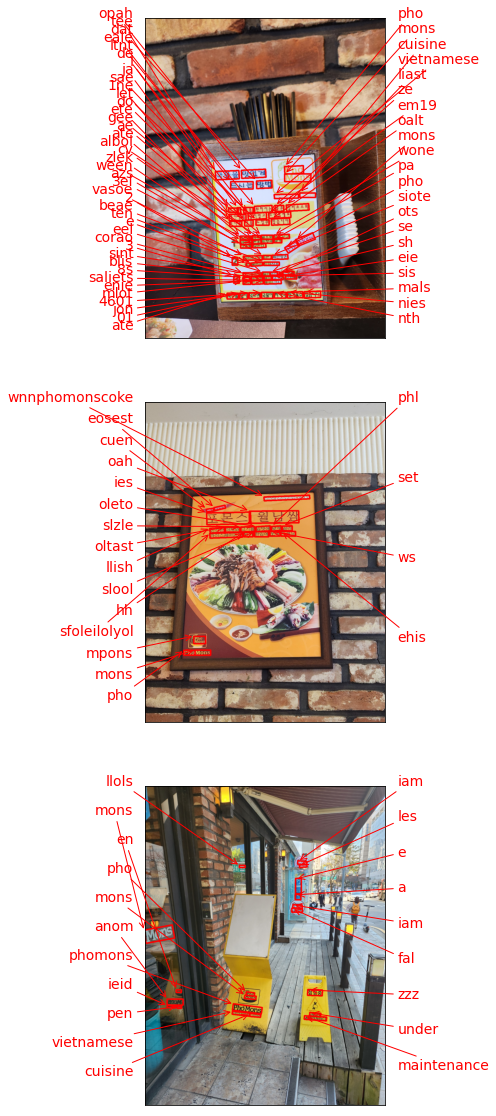

In [6]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

In [7]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='kor',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list


work_dir = os.getenv('HOME')+'/aiffel/OCR'
img_file_path = work_dir + '/img1.jpg'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

/aiffel/aiffel/OCR/0000.png
/aiffel/aiffel/OCR/0001.png
/aiffel/aiffel/OCR/0002.png
/aiffel/aiffel/OCR/0003.png
/aiffel/aiffel/OCR/0004.png
/aiffel/aiffel/OCR/0005.png
/aiffel/aiffel/OCR/0006.png
/aiffel/aiffel/OCR/0007.png
/aiffel/aiffel/OCR/0008.png
/aiffel/aiffel/OCR/0009.png
/aiffel/aiffel/OCR/0010.png
/aiffel/aiffel/OCR/0011.png
/aiffel/aiffel/OCR/0012.png
/aiffel/aiffel/OCR/0013.png
/aiffel/aiffel/OCR/0014.png
/aiffel/aiffel/OCR/0015.png
/aiffel/aiffel/OCR/0016.png
/aiffel/aiffel/OCR/0017.png
/aiffel/aiffel/OCR/0018.png
/aiffel/aiffel/OCR/0019.png
/aiffel/aiffel/OCR/0020.png
/aiffel/aiffel/OCR/0021.png
/aiffel/aiffel/OCR/0022.png
/aiffel/aiffel/OCR/0023.png
/aiffel/aiffel/OCR/0024.png
/aiffel/aiffel/OCR/0025.png
/aiffel/aiffel/OCR/0026.png
/aiffel/aiffel/OCR/0027.png
/aiffel/aiffel/OCR/0028.png
/aiffel/aiffel/OCR/0029.png
/aiffel/aiffel/OCR/0030.png
/aiffel/aiffel/OCR/0031.png
/aiffel/aiffel/OCR/0032.png
/aiffel/aiffel/OCR/0033.png
/aiffel/aiffel/OCR/0034.png
/aiffel/aiffel/OCR/0

In [8]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='kor',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")
recognize_images(cropped_image_path_list)

,

'

10

00\(1()프트

고수준

마을

ㆍ

원 학서는

분 온

빼지

|

소

스와

와

배영


을


- 도


말

은

드

서보

서

님

：

'열

토 더

른

른

맞을

을

느밍

우

수

! 습 니 닥.

에

퇴

으

~ 4

닐

으 5

넣

으

| 고

월 더


'

후

,

수 |핵

0

에

맞게

과

테

매

넣는다.

2

실ㅋ

1“

^

는


「

버

왜

^

를 ,

| 르

| 0

런

놀21/너

드슬

： 1 >”

^

^”

'

|

에

실ㄷ

1


_

1

너|

1 솔로

해 /\


1 |

'

쁘 에

거

드/1면

@

6 Ｌ

| 』


수

을


별

넘오면

국

물이

자 '

110

거울

|다.

[


Done


Step3. 테스트 결과 정리

In [9]:
import cv2

def ocr_model_comparison(img_idx):
    print('Original image:')
    img = cv2.imread(file_path[img_idx], cv2.IMREAD_COLOR)
    plt.imshow(img)
    plt.show()

    print('Tesseract result:\n')
    work_dir = os.getenv('HOME')+'/aiffel/OCR/'+str(img_idx)
    cropped_image_path = crop_word_regions(file_path[img_idx], work_dir)
    recognize_images(cropped_image_path)
        
    print('keras-ocr result:\n')
    keras_ocr.tools.drawAnnotations(image=images[img_idx], predictions=prediction_groups[img_idx][0])

Original image:


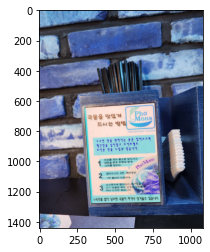

Tesseract result:

/aiffel/aiffel/OCR/0/0000.png
/aiffel/aiffel/OCR/0/0001.png
/aiffel/aiffel/OCR/0/0002.png
/aiffel/aiffel/OCR/0/0003.png
/aiffel/aiffel/OCR/0/0004.png
/aiffel/aiffel/OCR/0/0005.png
/aiffel/aiffel/OCR/0/0006.png
/aiffel/aiffel/OCR/0/0007.png
/aiffel/aiffel/OCR/0/0008.png
/aiffel/aiffel/OCR/0/0009.png
/aiffel/aiffel/OCR/0/0010.png
/aiffel/aiffel/OCR/0/0011.png
/aiffel/aiffel/OCR/0/0012.png
/aiffel/aiffel/OCR/0/0013.png
/aiffel/aiffel/OCR/0/0014.png
/aiffel/aiffel/OCR/0/0015.png
/aiffel/aiffel/OCR/0/0016.png
/aiffel/aiffel/OCR/0/0017.png
/aiffel/aiffel/OCR/0/0018.png
/aiffel/aiffel/OCR/0/0019.png
/aiffel/aiffel/OCR/0/0020.png
/aiffel/aiffel/OCR/0/0021.png
/aiffel/aiffel/OCR/0/0022.png
/aiffel/aiffel/OCR/0/0023.png
/aiffel/aiffel/OCR/0/0024.png
/aiffel/aiffel/OCR/0/0025.png
/aiffel/aiffel/OCR/0/0026.png
/aiffel/aiffel/OCR/0/0027.png
/aiffel/aiffel/OCR/0/0028.png
/aiffel/aiffel/OCR/0/0029.png
/aiffel/aiffel/OCR/0/0030.png
/aiffel/aiffel/OCR/0/0031.png
/aiffel/aiffel/OCR/0/

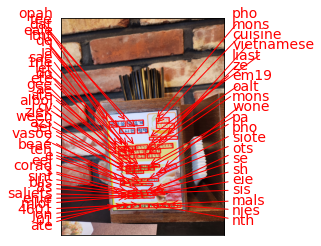

In [10]:
ocr_model_comparison(0)

Original image:


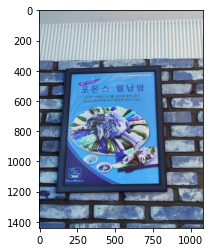

Tesseract result:

/aiffel/aiffel/OCR/1/0000.png
/aiffel/aiffel/OCR/1/0001.png
/aiffel/aiffel/OCR/1/0002.png
/aiffel/aiffel/OCR/1/0003.png
/aiffel/aiffel/OCR/1/0004.png
/aiffel/aiffel/OCR/1/0005.png
/aiffel/aiffel/OCR/1/0006.png
/aiffel/aiffel/OCR/1/0007.png
24

래

게

맞게

21(>


시 ~

1: 냐

Done
keras-ocr result:



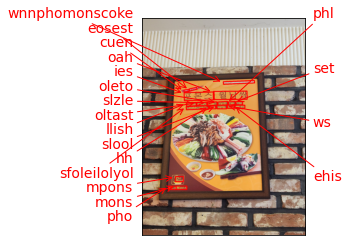

In [11]:
ocr_model_comparison(1)

Original image:


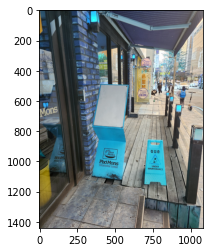

Tesseract result:

/aiffel/aiffel/OCR/2/0000.png

Done
keras-ocr result:



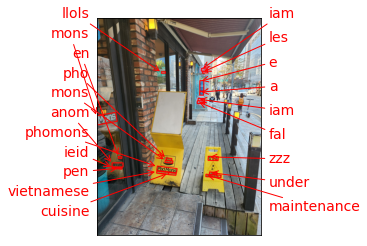

In [12]:
ocr_model_comparison(2)

Step4. 결과 분석과 결론 제시

In [13]:
#4. 결과 분석 및 결론
# 사거리 측 포몬스 식당의 메뉴와 간판 등을 대상으로 OCR을 진행하였다.
# 해당 식당의 자주 출현하는 텍스트를 추출하여 식당의 주력 메뉴가 무엇인지 등 식당이 다루는 메뉴에 대해 평하기 위함이다.
#손편지를 텍스트로 전환할 수 있도록, 다양한 언어, 손글씨 등에 대한 정확도를 평가하고자 했다.
#Tesseract
#언어를 따로 설정해줘야해서 설정하지 않은 언어에 대한 인식율이 굉장히 낮다.
#keras-ocr
#텍스트가 있는 위치는 잘 찾아내나, 정확도가 낮다.
#결론: keras-ocr이 위치도 잘 찾아내고 한글이 아닌, 영어의 경우 일치도가 tesseract에 비해 높아 이를 사용함이 옳다고 판단된다.

In [14]:
#회고
#- 이번 프로젝트에서 어려웠던 점
#: 비교 분석을 위한 이미지 시각화가 개인적으로 힘들었다.
#- 프로젝트를 진행하면서 알아낸 점 혹은 아직 모호한 점
#: Google OCR API가 효율이 좋다는 평이 많은데 이후 시도해봐야겠다.
#- 루브릭 평가 지표를 맞추기 위해 시도한 것들:
#: 평가 지표에 제시한대로 제시하고자 노력하였다.
#- 만약에 루브릭 평가 관련 지표를 달성 하지 못했을 때, 이유에 관한 추정:
#: 달성했다.
#- 자기 다짐:
#: 하면 된다.